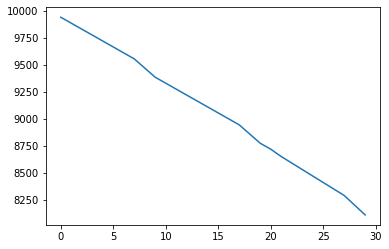

In [1]:
PORT = 8000

import requests

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Make a request to create a new simulation
def init():
    url = f'http://127.0.0.1:{PORT}/control/poll/create_from_example/sim1'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to run one step
def next_step():
    url = f'http://127.0.0.1:{PORT}/control/poll/run_one_step'
    response = requests.post(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Next Step")

# Make a request to get the current funds available
def get_next_point():
    url = f'http://127.0.0.1:{PORT}/enterprise/poll/inventory'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Funds : {jresponse['funds_in_eur']}")
        return jresponse['funds_in_eur']
    else:
        return None

# List holding the x values
data_x = []
# List holding the y values
data_y = []

# Create sim
init()

for x in range(0, 30):
    next_step() # Do one step
    y = get_next_point() # Request a new random value and store in y

    data_x.append(x)  # Add the current x to the list
    data_y.append(y) # Add the current y to the list

    clear_output(wait=True) # Clear / remove whatever was already plotted before
    plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
    plt.show() # Make sure to display the new plot, to make it visible
    time.sleep(0.1) # Wait 0.1 seconds before the next request

